# DEPRESSION ANALYSIS 

## Based on Comments on Social Media Platforms
Predicting based on your Statement


## Importing Necessary libraries

In [70]:
import pandas as pd
import seaborn as sns

### LOADING DATA INTO PANDAS DATAFRAME

In [71]:
df = pd.read_csv("depression_data.csv")
df.head(5)

,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


### DATA EXPLORATION

1.Checking random messages(Comments).

2.Dropping irrelevant Features.

3.Shape of Data

In [72]:
df['message'].iloc[:1]

0    just had a real good moment. i missssssssss hi...
Name: message, dtype: object

In [73]:
df.columns

Index(['Unnamed: 0', 'message', 'label'], dtype='object')

In [74]:
df = df.drop('Unnamed: 0',axis=1)

In [75]:
df

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [76]:
df.shape

(10314, 2)

### VISUALIZING THE DATA 

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

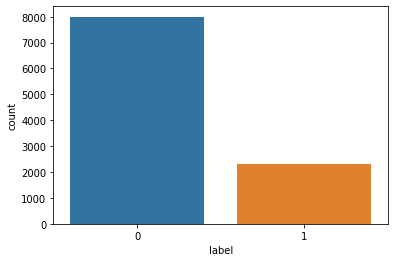

In [77]:
sns.countplot(df['label']) 

# DATA PREPROCESSING :-

1.Importing the libraries for Processing the message feature.

2.Using Word_Net_Lemmatizer for converting in words.

3.Lower case the Words.

4.Split the message.

5.Joining the word after Lemmatizing of each word.


In [78]:
import re
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
# ps = PorterStemmer()
wo = WordNetLemmatizer()
corpus=[]
for i in range(0,len(df)):
    message = re.sub('[^a-zA-Z]',' ',df['message'][i])
    message = message.lower()
    message = message.split()
    message = [wo.lemmatize(word) for word in message ]
    message = ' '.join(message)
    corpus.append(message)

In [79]:
# pip install wordcloud

In [80]:
corpus[2]

'comeagainjen http twitpic com y lx http www youtube com watch v zogfqvh me'

### IMPORTING THE REQUIRED LIBRARIES FOR WORDS INITILIAZATION

In [81]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### HERE IT'LL SHOW THE MOST DEPRESSIVE WORDS FROM DATA

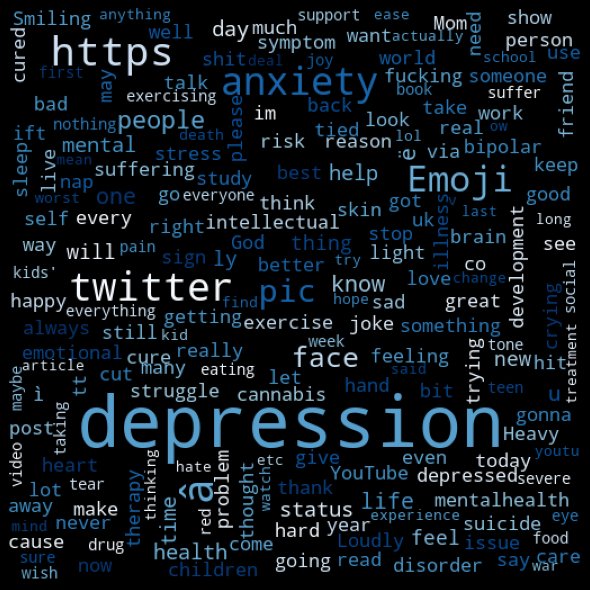

In [82]:
depressive_words = ' '.join(list(df[df['label'] == 1]['message']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

### HERE IT'LL SHOW THE MOST POSITIVE WORDS FROM DATA

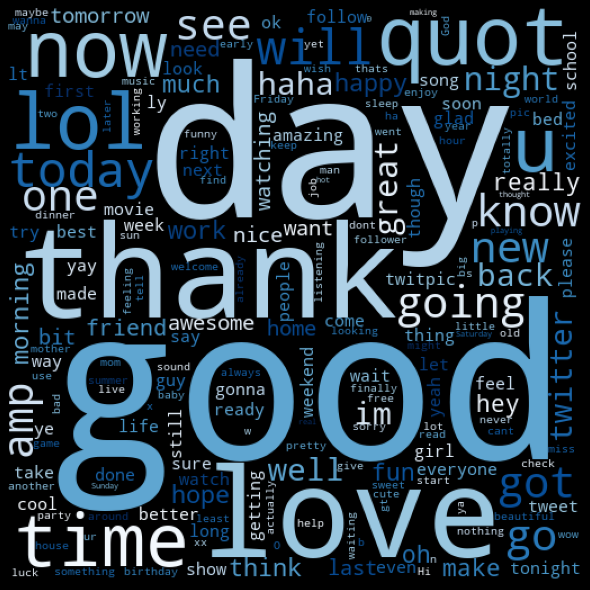

In [83]:
positive_words = ' '.join(list(df[df['label'] == 0]['message']))
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

### IMPORTING TRAIN_TEST_SPLIT

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(corpus,df['label'],test_size=0.25,random_state=42)

### IMPORTING TFID VECTORIZER 

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer( ngram_range=(1,3), stop_words='english',max_features=15000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [90]:
X_train_vect.shape

(7735, 15000)

### IMPORTING SMOTE FOR SAMPLING THE DATA FOR BALANCING THE DATASET

In [100]:
from imblearn.over_sampling import SMOTE
x_resample, y_resample = SMOTE().fit_sample(X_train_vect, y_train)
x_test_resample, y_test_resample = SMOTE().fit_sample(X_test_vect, y_test)
# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(11978, 15000)
(11978,)


### APPLYING LOGISTIC REGRESSION MODEL 

In [101]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf.fit(x_resample,y_resample)

LogisticRegression()

### CLASSIFICATION REPORT FOR CHECKING THE ACCURACY

In [102]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = clf.predict(x_test_resample)
accuracy_score(y_test_resample,y_pred)
print(classification_report(y_test_resample,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2011
           1       0.99      0.95      0.97      2011

    accuracy                           0.97      4022
   macro avg       0.97      0.97      0.97      4022
weighted avg       0.97      0.97      0.97      4022



### APPLYING NAIVE BAYES MULTINOMIALNB MODEL 

In [104]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_resample,y_resample)

MultinomialNB()

### CLASSIFICATION REPORT FOR CHECKING THE ACCURACY OF NAIVE BAYES MODEL

In [105]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = mnb.predict(x_test_resample)
accuracy_score(y_test_resample,y_pred)
print(classification_report(y_test_resample,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2011
           1       0.95      0.96      0.96      2011

    accuracy                           0.96      4022
   macro avg       0.96      0.96      0.96      4022
weighted avg       0.96      0.96      0.96      4022



### FOR TAKING USER INPUT AND PREDICTION

In [126]:
def preprocess(data):
    #preprocess
    a = re.sub('[^a-zA-Z]',' ',data)
    a = a.lower()
    a = a.split()
    a = [wo.lemmatize(word) for word in a ]
    a = ' '.join(a)  
    return a

In [128]:
import re
strr = input('Enter YOur mood: ')
print("-------------------------------")
examples = strr

a = preprocess(examples)

example_counts = vectorizer.transform([a])
prediction =mnb.predict(example_counts)
prediction[0]

if prediction[0]==0:
    print('Positive')
elif prediction[0]==1:
    print('depressive')

Enter YOur mood: i am depressed
-------------------------------
depressive


### CREATING PICKLE FILE FOR DEPLOYEMENT

In [124]:
#dumb file
import pickle
filename = 'vectorizer.pkl'
pickle.dump(vectorizer, open(filename, 'wb'))

In [125]:
filename = 'prediction.pkl'
pickle.dump(mnb, open(filename, 'wb'))